In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import time

In [2]:
def sum_sr(env, V, s, a, gamma):
    """Calc state-action value for state 's' and action 'a'"""
    tmp = 0  # state value for state s
    for p, s_, r, _ in env.model[s][a]:     # see note #1 !
        # p  - transition probability from (s,a) to (s')
        # s_ - next state (s')
        # r  - reward on transition from (s,a) to (s')
        tmp += p * (r + gamma * V[s_])
    return tmp

In [3]:
# Naive implementation (for loops are slow), but matches the box
def policy_iter(env, gamma, theta):
    """Policy Iteration Algorithm
    
    Params:
        env - environment with following required memebers:
            env.nb_states - number of states
            env.nb_action - number of actions
            env.model     - prob-transitions and rewards for all states and actions, see note #1
        gamma (float) - discount factor
        theta (float) - termination condition
    """
    
    # 1. Initialization
    V = np.zeros(env.nb_states)
    pi = np.zeros(env.nb_states, dtype=int)  # greedy, always pick action 0
    
    while True:
    
        # 2. Policy Evaluation
        while True:
            delta = 0
            for s in range(env.nb_states):
                v = V[s]
                V[s] = sum_sr(env, V=V, s=s, a=pi[s], gamma=gamma)
                delta = max(delta, abs(v - V[s]))
            if delta < theta: break

        # 3. Policy Improvement
        policy_stable = True
        for s in range(env.nb_states):
            old_action = pi[s]
            pi[s] = np.argmax([sum_sr(env, V=V, s=s, a=a, gamma=gamma)  # list comprehension
                               for a in range(env.nb_actions)])
            if old_action != pi[s]: policy_stable = False
        if policy_stable: break
    
    return V, pi

In [4]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [5]:
def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

In [6]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [7]:
if not hasattr(env, 'nb_states'):  env.nb_states = env.env.nS
if not hasattr(env, 'nb_actions'): env.nb_actions = env.env.nA
if not hasattr(env, 'model'):      env.model = env.env.P

In [8]:
V, pi = policy_iter(env, gamma=1.0, theta=1e-8)
print(V.reshape([4, -1]))

[[0.82352925 0.82352919 0.82352915 0.82352913]
 [0.82352926 0.         0.52941165 0.        ]
 [0.82352929 0.82352932 0.7647058  0.        ]
 [0.         0.88235288 0.94117644 0.        ]]


In [9]:
gamma_arr = [(i+0.5)/10 for i in range(10)]
V_arr, pi_arr, scores, time_arr = [], [], [], []
for g in gamma_arr:
    s = time.time()
    V, pi = policy_iter(env, gamma=g, theta=1e-8)
    score = evaluate_policy(env, V, gamma=g)
    time_arr.append(time.time()-s)
    V_arr.append(V)
    pi_arr.append(pi)
    scores.append(score)

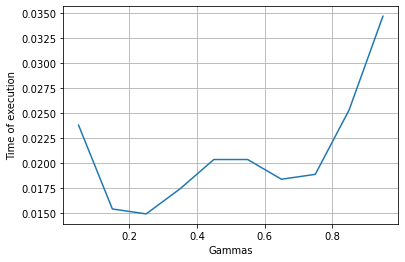

In [11]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.grid()
plt.show()

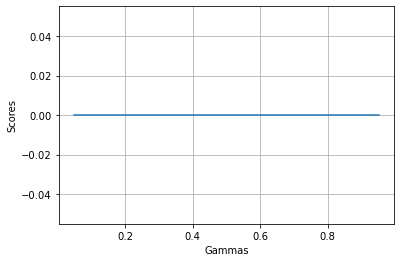

In [12]:
plt.plot(gamma_arr, scores)
plt.xlabel('Gammas')
plt.ylabel('Scores')
plt.grid()
plt.show()